In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('dataset_bps_12.csv', sep=',')
df

,0,1,2,3,4,5,6,7,8,9,10,11,target
0,-17.5,-17.5,-14.7,-14.9,-19.5,-18.1,-15.8,-17.5,-19.5,-18.1,-17.5,-19.5,0
1,-17.5,-17.5,-14.7,-19.5,-16.7,-17.5,-17.5,-19.5,-18.1,-14.7,-15.8,-17.5,0
2,-17.5,-18.1,-19.5,-17.5,-15.8,-14.9,-14.7,-18.1,-14.9,-15.8,-17.0,-17.5,0
3,-19.5,-14.7,-14.9,-15.8,-17.0,-17.5,-15.8,-18.1,-17.0,-18.1,-15.8,-17.5,0
4,-15.8,-14.7,-15.8,-17.5,-14.7,-14.9,-14.9,-15.8,-14.7,-15.8,-19.5,-18.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-19.2,-14.7,-15.8,-17.0,-16.7,-17.0,-17.5,-18.1,-19.2,-14.7,-19.5,-18.1,1
796,-19.2,-18.1,-17.5,-17.0,-16.7,-17.0,-17.5,-18.1,-19.2,-14.7,-19.5,-18.1,1
797,-19.2,-18.1,-17.5,-14.7,-14.9,-14.9,-19.2,-14.7,-17.5,-17.5,-18.1,-19.2,1
798,-19.2,-18.1,-17.5,-14.7,-19.5,-15.8,-14.9,-14.7,-17.5,-17.5,-18.1,-19.2,1


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
y_pred = rf_classifier.predict(X_test)

Accuracy: 0.8
Confusion matrix:
[[79  7]
 [25 49]]
Precision: 0.8173076923076923
Recall: 0.7903834066624764
F1-Score: 0.7927125506072874


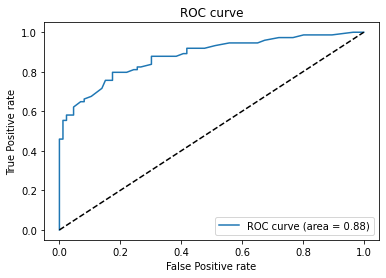

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)


y_scores = rf_classifier.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)


plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()